In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
eta = 0.8
kappa = 0.01
epsilon = 1e-6

phimin = eta*(1-eta)/(1+eta) + epsilon
phimax = 1-eta - epsilon
#phimin = 0.015

In [10]:
phimin

0.08888988888888888

In [11]:
(eta-phimin)/(2*eta*phimin)

4.999936719461906

In [12]:
phi_0 = 0.1
r = 0.006
u_0 =   1/(1-eta)
v_0 = (1-phi_0*u_0)*(1+eta*u_0)

In [13]:
phi02=0.108
u02 = 4.6
v02 = (1-phi02*u02)*(1+eta*u02)


In [14]:
from scipy.integrate import solve_ivp

def F(t,x):
    #phimin = eta*(1-eta)/(1+eta) 
    phimax = 1-eta 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    if x[2] <= phimin or x[2] >= phimax:
        dphi = 0
    else:
        dphi = r
    return [du,dv,dphi]

def G(t,x):
    #phimin = eta*(1-eta)/(1+eta) 
    #phimax = 1-eta 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    if x[2] <= phimin or x[2] >= phimax:
        dphi = 0
    else:
        dphi = r
    return [-du,-dv,-dphi]



sol = solve_ivp(F, [0, 100], [u_0,v_0,phi_0],method='BDF',atol=1e-10,rtol=1e-8)
sol2 = solve_ivp(F, [0, 100], [u02,v02,phi02],method='BDF',atol=1e-10,rtol=1e-8)
sol3 = solve_ivp(G, [0, 3], [u_0,v_0,phi_0],method='BDF',atol=1e-14,rtol=1e-12)
sol4 = solve_ivp(F, [0, 100], [3,3,phimin],method='BDF',atol=1e-10,rtol=1e-10)
#sol3 = solve_ivp(F,)

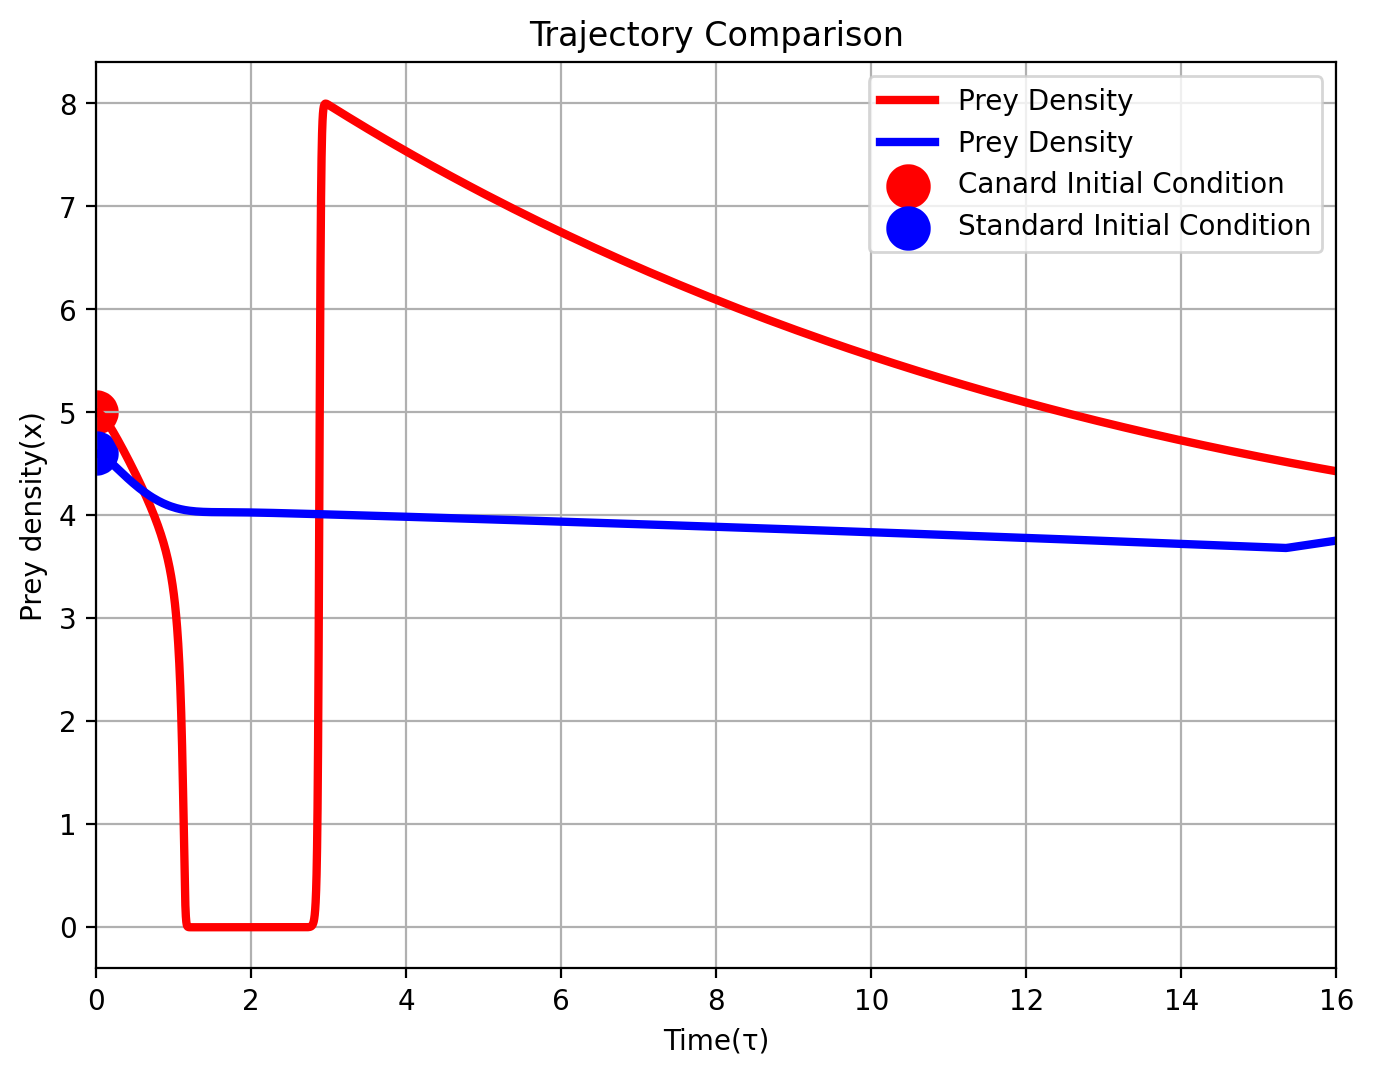

In [17]:
plt.figure(figsize = (8,6),dpi=200)
plt.plot(sol.t,sol.y[0],linewidth=3,label="Prey Density",color='r')
plt.plot(sol2.t,sol2.y[0],linewidth=3,label="Prey Density",color='b')
plt.scatter(0,u_0,linewidth=10,color='r',label="Canard Initial Condition")
plt.scatter(0,u02,linewidth=10,color='b',label="Standard Initial Condition")
plt.xlim(0,20)
plt.xlabel("Time(τ)")
plt.legend()
plt.ylabel("Prey density(x)")
plt.title("Trajectory Comparison")
plt.grid()
plt.xlim(0,16)
#plt.savefig("Traj_compar_Time_series")

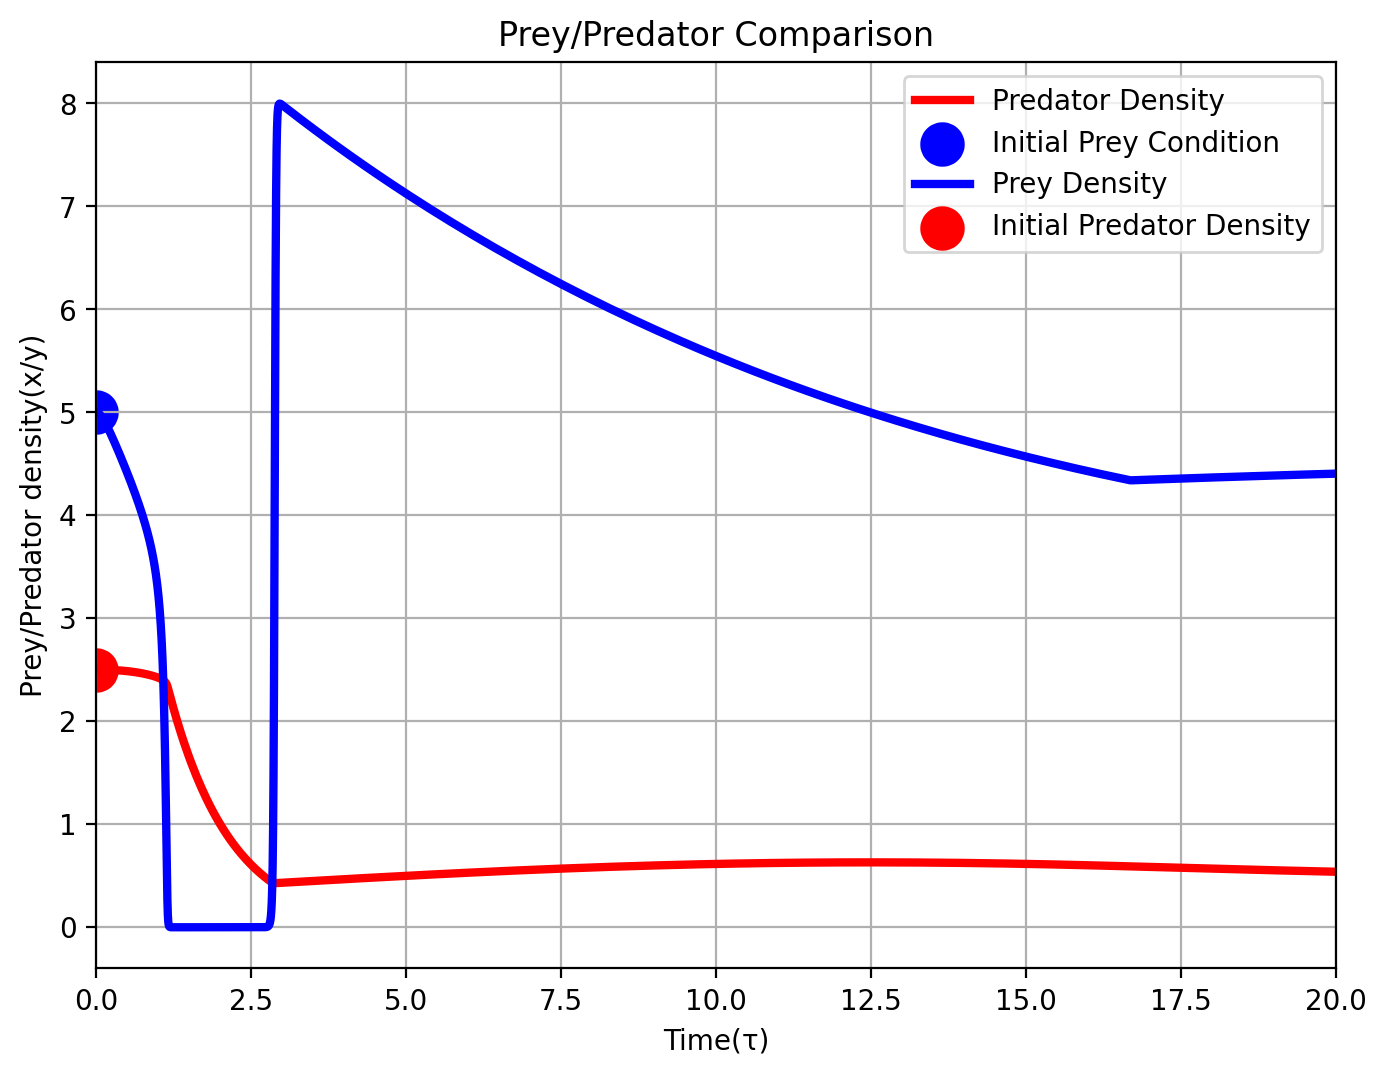

In [19]:
plt.figure(figsize = (8,6),dpi=200)
plt.plot(sol.t,sol.y[1],linewidth=3,label="Predator Density",color='r')
plt.scatter(0,u_0,linewidth=10,color='b',label="Initial Prey Condition")
plt.plot(sol.t,sol.y[0],linewidth=3,label="Prey Density",color='b')
plt.scatter(0,v_0,linewidth=10,color='r',label="Initial Predator Density")
plt.xlim(0,20)
plt.xlabel("Time(τ)")
plt.legend()
plt.ylabel("Prey/Predator density(x/y)")
plt.title("Prey/Predator Comparison")
plt.grid()
plt.savefig("Prey_Pred_comaprison")

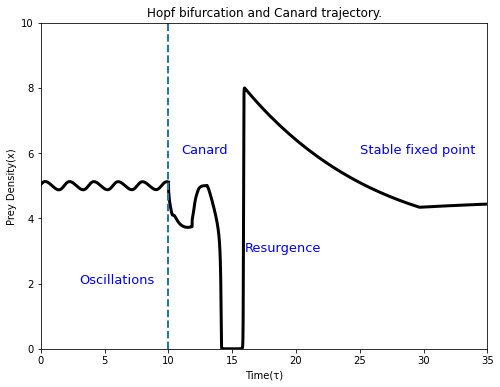

In [15]:
plt.figure(figsize=(8,6))
plt.plot(sol4.t-90,sol4.y[0],linewidth=3,color='k')
plt.plot(sol3.t+100-90,sol3.y[0][::-1],linewidth=3,color='k')
plt.plot(sol.t+103-90,sol.y[0],linewidth=3,color='k')
plt.xlim([0,35])
plt.ylim([0,10])
plt.xlabel("Time(τ)")
plt.ylabel("Prey Density(x)")
plt.text(3,2,"Oscillations",color='b',fontsize=13)
plt.text(11,6,"Canard",color='b',fontsize=13)
plt.text(16,3,"Resurgence",color='b',fontsize=13)
plt.text(25,6,"Stable fixed point",color='b',fontsize=13)
plt.title("Hopf bifurcation and Canard trajectory.")
plt.axvline(x=10,linestyle='--',linewidth=2)
plt.savefig("Canard_with_hopf_trajectory")

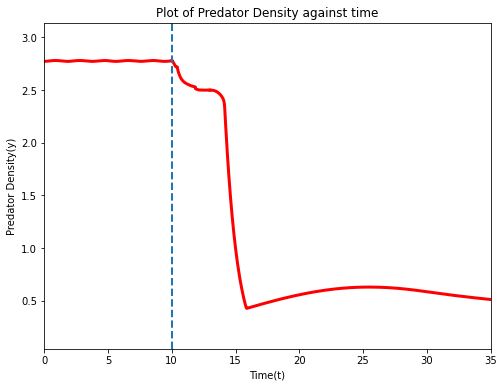

In [222]:
plt.figure(figsize=(8,6))
plt.plot(sol4.t-90,sol4.y[1],linewidth=3,color='r')
plt.plot(sol3.t+100-90,sol3.y[1][::-1],linewidth=3,color='r')
plt.plot(sol.t+103-90,sol.y[1],linewidth=3,color='r')
plt.xlim([0,35])
#plt.ylim([,])
plt.axvline(x=10,linestyle='--',linewidth=2)
plt.xlabel("Time(t)")
plt.ylabel("Predator Density(y)")
plt.title("Plot of Predator Density against time")
plt.savefig("Predator_density_Hopf")

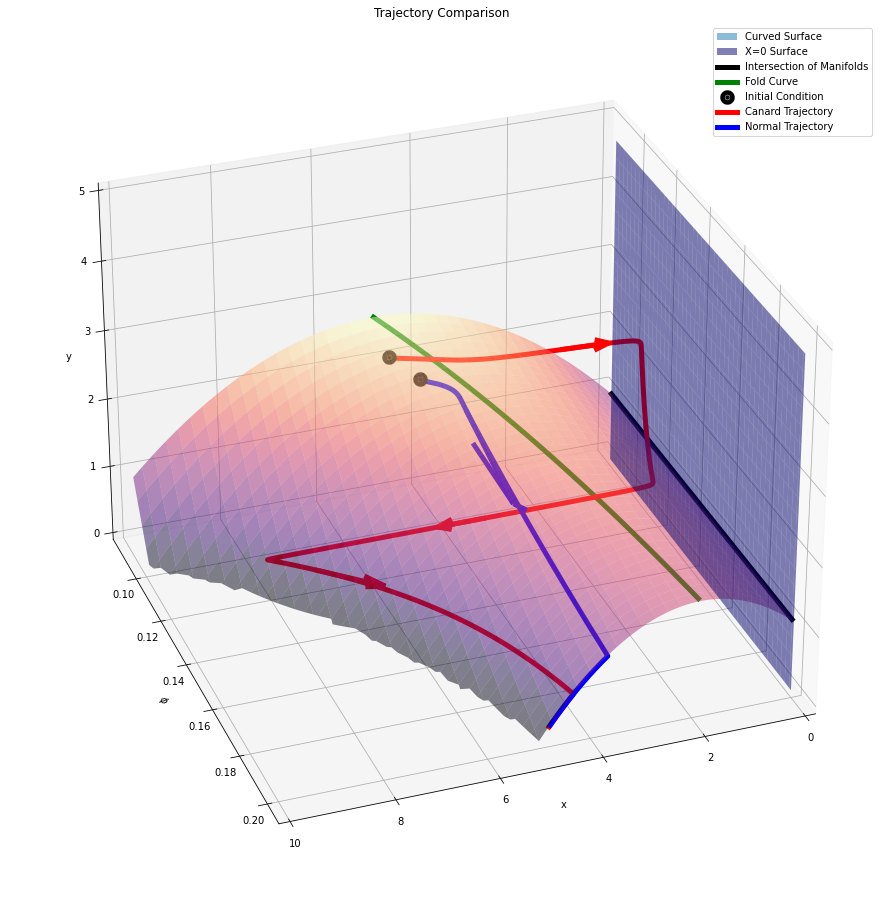

In [21]:

from matplotlib import cm
fig = plt.figure(figsize = (20,16))
ax2 = fig.add_subplot(111,projection='3d')

#phimin = 0.05

u = np.arange(0,10,0.125/2)
phi  = np.arange(phimin,phimax,0.001)
U, PHI = np.meshgrid(u,phi)
V = (1-PHI*U)*(1+eta*U)
V_max = np.where(V<0,None,V)
surf = ax2.plot_surface(U,PHI,V_max, cmap=cm.magma,linewidth=0, antialiased=True,alpha=0.5,label="Critical_Manifold")
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d


V2 = np.arange(0, 5, 0.25)
PHI2 = np.arange(phimin,phimax,0.002/4)
PHI2, V2 = np.meshgrid(PHI2, V2)
U2 = PHI2*0
U_0 = ax2.plot_surface(U2, PHI2,V2,linewidth=0, antialiased=True,alpha=0.5,label="U=0 Plane",color = 'b')
U_0._edgecolors2d = U_0._edgecolor3d
U_0._facecolors2d = U_0._facecolor3d

deriv = F(0,[u_0,phi_0,v_0])
u = sol.y[0]
v = sol.y[1]
phi = sol.y[2]
du = []
dv = []
dphi = []
u_used =[]
v_used =[]
phi_used =[]
#for j in range(10):
    #u_i = u[100*j]
    #v_i = v[100*j]
    #phi_i = phi[100*j]
    #deriv =  F(0,[u_i,v_i,phi_i])
 #   u_used.append(u_i)
  #  v_used.append(v_i)
   # phi_used.append(phi_i)
   # du.append(deriv[0])
   # dv.append(deriv[1])
   # dphi.append(deriv[2])

#ax2.quiver(u_used,phi_used,v_used,du,dphi,dv,normalize=True,length=0.5)



PHI3 = np.arange(phimin,phimax,0.002)
xline = (eta-PHI3)/(2*eta*PHI3)
zline = (eta+PHI3)**2/(4*eta*PHI3)

Fold_2, = ax2.plot3D(xline,PHI3,zline,color='g',linewidth = 5)
Intersection, = ax2.plot([0,0],[PHI3[0],PHI3[-1]],[1,1],linewidth=5,label="Intersection of Manifolds",color='k')

CURVE,= ax2.plot3D(sol.y[0],sol.y[2],sol.y[1],color='r',linewidth = 5,label="r")
CURVE2, = ax2.plot3D(sol2.y[0],sol2.y[2],sol2.y[1],color='b',linewidth = 5)
B = np.append(sol.y[:,150],F(0,sol.y[:,150]))
C = np.append(sol.y[:,630],F(0,sol.y[:,630]))
D = np.append(sol.y[:,770],F(0,sol.y[:,770]))
arrow = ax2.quiver3D(B[0],B[2],B[1],B[3],B[5],B[4],normalize=True,linewidth=5,color='r')
arrow = ax2.quiver3D(C[0],C[2],C[1],C[3],C[5],C[4],normalize=True,linewidth=5,color='r')
arrow = ax2.quiver3D(D[0],D[2],D[1],D[3],D[5],D[4],normalize=True,linewidth=5,color='r')

B1 = np.append(sol2.y[:,100],F(0,sol2.y[:,100]))
#C1 = np.append(sol2.y[:,240],F(0,sol2.y[:,240]))
#D1 = np.append(sol2.y[:,400],F(0,sol2.y[:,400]))
arrow = ax2.quiver3D(B1[0],B1[2],B1[1],B1[3],B1[5],B1[4],normalize=True,linewidth=5,color='b',length=0.5)
#arrow = ax2.quiver3D(C1[0],C1[2],C1[1],C1[3],C1[5],C1[4],normalize=True,linewidth=5,color='b',length=0.2)
#arrow = ax2.quiver3D(D1[0],D1[2],D1[1],D1[3],D1[5],D1[4],normalize=True,linewidth=5,color='b')



IC = ax2.scatter(u_0,phi_0,v_0,marker='o',linewidth=10,color='k')
IC2 = ax2.scatter(u02,phi02,v02,marker='o',linewidth=10,color='k')
plt.legend([surf,U_0,Intersection,Fold_2,IC,CURVE,CURVE2],["Curved Surface","X=0 Surface","Intersection of Manifolds","Fold Curve","Initial Condition","Canard Trajectory","Normal Trajectory"])
ax2.set_zlim([0,5])
ax2.set_xlim([0,10])
#ax2.set_ylim([phimin,phimax])
ax2.set_xlabel("x")
ax2.set_ylabel("$\phi$")
ax2.set_zlabel("y")
ax2.set_title("Trajectory Comparison")
ax2.view_init(elev=30, azim=70)
#plt.savefig("Canard_solution.png")
#ax2.text(6,0.11,2,"Attracting",color='b',size=20)
#ax2.text(3,0.11,2,"Repelling",color='b',size=20)
#plt.savefig("Traj_Comparison_3D")